<a href="https://colab.research.google.com/github/CamilaSDantas/vacina_covid19_pernambuco/blob/main/An%C3%A1lisePEcovid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install geopandas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import pyplot
import random
import geopandas as gpd

In [6]:
municipios = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/tcc/coordmunicipios.csv')
idhpe = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/tcc/idhpe.csv')
covid = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/PEdadosVACINA.csv',sep=';', decimal=',')
idhm = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/IDH10+.csv')
corvacinados = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/dadoscorvac.csv')
peMunicipios = gpd.read_file('/content/drive/MyDrive/Covid19 dados tcc/tcc/PE_Mun97_region.shx')

In [7]:
municipios.head()

,Codmun,Município,latitude,longitude
0,260005,ABREU E LIMA,-7.90072,-34.8984
1,260010,AFOGADOS DA INGAZEIRA,-7.74312,-37631.0000
2,260020,AFRÂNIO,-8.51136,-41.0095
3,260030,AGRESTINA,-8.45966,-35.9447
4,260040,ÁGUA PRETA,-8.70609,-35.5263


In [8]:
idhpe.head()

,Codmun6,Município,IDMH,IDHM_E,IDHM_L,IDHM_R
0,260005,ABREU E LIMA,679,632,791,625
1,260010,AFOGADOS DA INGAZEIRA,657,565,807,623
2,260020,AFRÂNIO,588,493,761,542
3,260030,AGRESTINA,592,470,760,581
4,260040,ÁGUA PRETA,553,432,761,514


In [9]:
covid.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,f2a49507-1215-412c-af15-bc198ec9f941-i0b0,31887a35f9788fc6f4b67634beead5e735baf76a4f73f3...,36.0,1985-02-16,M,3.0,PARDA,260530.0,10.0,EXU,BRASIL,PE,56230.0,B,2435799,MUNICIPIO DE EXU,UNIDADE DE SAUDE DA FAMILIA DO CENTRO I,260530,EXU,PE,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,FD7209,MINISTERIO DA SAUDE,Organization/00394544000851,2021-08-10,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-08-11T18:45:46.000Z,16341
1,fec72d41-b707-437c-9286-320e8d9fec12-i0b0,758a450a6eca97d274481584b30c456947a8a2a8e837de...,72.0,1948-08-15,F,3.0,PARDA,260845.0,10.0,LAGOA DO CARRO,BRASIL,PE,55820.0,B,2433001,PREFEITURA MUNICIPAL DE LAGOA DO CARRO,POLICLINICA SEVERINO NASCIMENTO CRUZ,260845,LAGOA DO CARRO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210114,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-23,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-27T14:56:27.000Z,16341
2,0f28f593-d6c9-4be0-8ec3-4fd716cbe613-i0b0,f76aadad27f1aab693b105314ee28e7682941147f786ac...,59.0,1961-10-10,M,99.0,SEM INFORMACAO,260290.0,10.0,CABO DE SANTO AGOSTINHO,BRASIL,PE,NaN,B,20362,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,USF SACRAMENTO,260290,CABO DE SANTO AGOSTINHO,PE,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,ABW4735,MINISTERIO DA SAUDE,Organization/00394544000851,2021-06-03,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-06-07T17:45:57.000Z,16341
3,0bc830d8-f280-43d2-b777-3b339d3a2c11-i0b0,b152bda3e59de654003c5c59fab10eced492c536a1412c...,71.0,1949-09-18,M,4.0,AMARELA,261640.0,10.0,VITORIA DE SANTO ANTAO,BRASIL,PE,55602.0,B,2638045,FUNDO MUNICIPAL DE SAUDE DE VITORIA DE SANTO A...,U S F ALTO JOSE LEAL,261640,VITORIA DE SANTO ANTAO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210142,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-20,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-23T13:46:52.000Z,16341
4,2acd9afb-2191-4b92-918e-d9bd46078117-i0b0,2ee331cd395a0c0b098670832fa4fa6d3fb8752bd37a05...,27.0,1994-03-20,F,3.0,PARDA,261610.0,10.0,VERDEJANTE,BRASIL,PE,56120.0,B,2714736,PREFEITURA MUNICIPAL DE VERDEJANTE,UNIDADE DE SAUDE DA FAMILIA DE GROSSOS,261610,VERDEJANTE,PE,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,216VCD206Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-07-30,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-08-06T13:45:44.000Z,16341


In [10]:
idhpe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Codmun6    185 non-null    int64 
 1   Município  185 non-null    object
 2   IDMH       185 non-null    int64 
 3   IDHM_E     185 non-null    int64 
 4   IDHM_L     185 non-null    int64 
 5   IDHM_R     185 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 8.8+ KB


In [11]:
colunas = ['paciente_idade', 'paciente_enumsexobiologico', 'paciente_racacor_valor','estabelecimento_municipio_codigo', 'paciente_endereco_nmmunicipio', 'vacina_grupoatendimento_nome', 'vacina_nome']
covid = covid[colunas]

In [12]:
covid.head()

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,estabelecimento_municipio_codigo,paciente_endereco_nmmunicipio,vacina_grupoatendimento_nome,vacina_nome
0,36.0,M,PARDA,260530,EXU,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
1,72.0,F,PARDA,260845,LAGOA DO CARRO,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
2,59.0,M,SEM INFORMACAO,260290,CABO DE SANTO AGOSTINHO,Pessoas de 18 a 64 anos,Covid-19-AstraZeneca
3,71.0,M,AMARELA,261640,VITORIA DE SANTO ANTAO,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
4,27.0,F,PARDA,261610,VERDEJANTE,Pessoas de 18 a 64 anos,Vacina Covid-19 - Covishield


In [13]:
covid.dropna(subset= ['paciente_racacor_valor'], inplace = True)

In [14]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10056886 entries, 0 to 10056893
Data columns (total 7 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   paciente_idade                    float64
 1   paciente_enumsexobiologico        object 
 2   paciente_racacor_valor            object 
 3   estabelecimento_municipio_codigo  int64  
 4   paciente_endereco_nmmunicipio     object 
 5   vacina_grupoatendimento_nome      object 
 6   vacina_nome                       object 
dtypes: float64(1), int64(1), object(5)
memory usage: 613.8+ MB


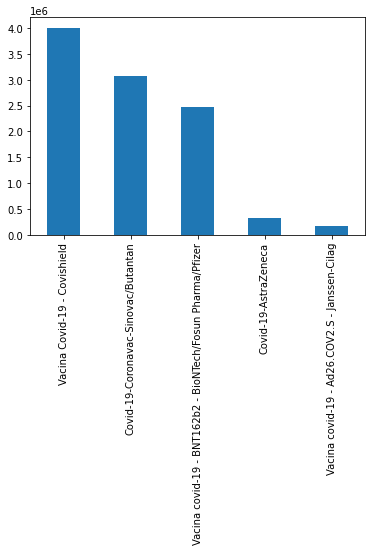

In [15]:
covid['vacina_nome'].value_counts().plot(kind='bar')

In [16]:
sexo = covid['paciente_enumsexobiologico'].value_counts()

In [17]:
sexo.head()


F    5538263
M    4518611
I         12
Name: paciente_enumsexobiologico, dtype: int64

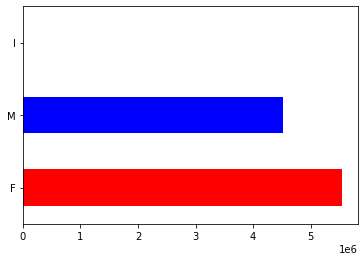

In [18]:
sexo.plot(kind='barh', color = ['red', 'blue'])

In [19]:
idhpe.describe()

,Codmun6,IDMH,IDHM_E,IDHM_L,IDHM_R
count,185.000000,185.000000,185.000000,185.000000,185.000000
mean,260823.702703,596.248649,490.556757,755.659459,574.378378
std,470.173966,47.514561,67.966170,34.984278,47.082924
min,260005.000000,487.000000,354.000000,676.000000,477.000000
25%,260420.000000,567.000000,443.000000,731.000000,543.000000
50%,260820.000000,593.000000,489.000000,758.000000,566.000000
75%,261230.000000,613.000000,525.000000,778.000000,598.000000
max,261650.000000,788.000000,748.000000,839.000000,798.000000


In [20]:
vacinacao = pd.merge(idhpe,covid,left_on='Codmun6', right_on='estabelecimento_municipio_codigo')

In [21]:
vacinacao.head()

,Codmun6,Município,IDMH,IDHM_E,IDHM_L,IDHM_R,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,estabelecimento_municipio_codigo,paciente_endereco_nmmunicipio,vacina_grupoatendimento_nome,vacina_nome
0,260005,ABREU E LIMA,679,632,791,625,48.0,M,SEM INFORMACAO,260005,RECIFE,Outros,Covid-19-Coronavac-Sinovac/Butantan
1,260005,ABREU E LIMA,679,632,791,625,53.0,M,PRETA,260005,JABOATAO DOS GUARARAPES,Ensino Básico,Vacina Covid-19 - Covishield
2,260005,ABREU E LIMA,679,632,791,625,26.0,M,SEM INFORMACAO,260005,IGARASSU,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
3,260005,ABREU E LIMA,679,632,791,625,17.0,M,PARDA,260005,ABREU E LIMA,NaN,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
4,260005,ABREU E LIMA,679,632,791,625,17.0,F,PRETA,260005,ABREU E LIMA,NaN,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...


In [22]:
vacinaspe = pd.merge(vacinacao, municipios, left_on='Codmun6', right_on='Codmun')

In [23]:
vacinaspe.head()

,Codmun6,Município_x,IDMH,IDHM_E,IDHM_L,IDHM_R,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,estabelecimento_municipio_codigo,paciente_endereco_nmmunicipio,vacina_grupoatendimento_nome,vacina_nome,Codmun,Município_y,latitude,longitude
0,260005,ABREU E LIMA,679,632,791,625,48.0,M,SEM INFORMACAO,260005,RECIFE,Outros,Covid-19-Coronavac-Sinovac/Butantan,260005,ABREU E LIMA,-7.90072,-34.8984
1,260005,ABREU E LIMA,679,632,791,625,53.0,M,PRETA,260005,JABOATAO DOS GUARARAPES,Ensino Básico,Vacina Covid-19 - Covishield,260005,ABREU E LIMA,-7.90072,-34.8984
2,260005,ABREU E LIMA,679,632,791,625,26.0,M,SEM INFORMACAO,260005,IGARASSU,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,260005,ABREU E LIMA,-7.90072,-34.8984
3,260005,ABREU E LIMA,679,632,791,625,17.0,M,PARDA,260005,ABREU E LIMA,NaN,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,260005,ABREU E LIMA,-7.90072,-34.8984
4,260005,ABREU E LIMA,679,632,791,625,17.0,F,PRETA,260005,ABREU E LIMA,NaN,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,260005,ABREU E LIMA,-7.90072,-34.8984


In [24]:
corvacinados.head()

,COR,QUANTIDADE
0,Parda,652816
1,Branca,534005
2,Preta,184963
3,Amarela,27805
4,Indígena,5297


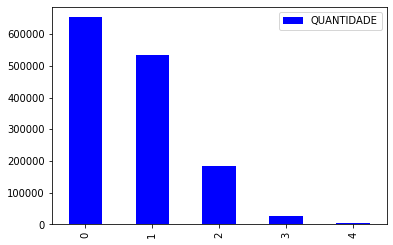

In [25]:
corvacinados.plot(kind='bar', color = ['blue'])

In [26]:
correlation = idhm.corr()

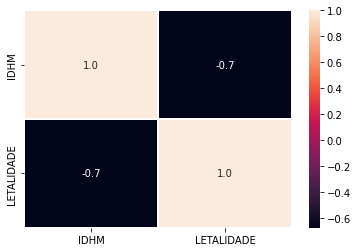

In [27]:
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

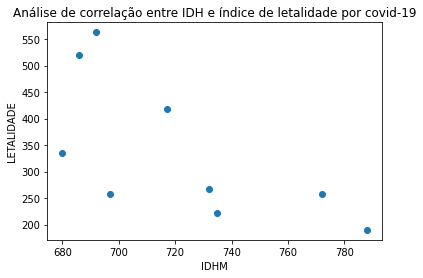

In [28]:
x = [idhm.IDHM]
y = [idhm.LETALIDADE]

titulo = "Análise de correlação entre IDH e índice de letalidade por covid-19"
eixox = "IDHM"
eixoy = "LETALIDADE"

plt.title(titulo)
plt.xlabel(eixox)
plt.ylabel(eixoy)

plt.scatter(x, y)

plt.show()

In [30]:
peMunicipios.head()

,CODMUN6,MUNIC_PIO,SEM_ACENTO,MUNIC_PI0,UF,UF_IBGE,REGI_O,MESO_IBGE,MESO_IBG0,MICRO_IBGE,MICRO_IB0,MESO_IBG1,MICRO_IB1,AREA_97,SEDE,SEDE0,N91,N96,CODCOMP,geometry
0,260020,AFRÂNIO,AFRANIO,2600203,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,1482.423,-41.005,-8.515,13544.0,13886.0,260200500203,"POLYGON ((-41.35756 -8.70651, -41.34930 -8.707..."
1,261110,PETROLINA,PETROLINA,2611101,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,4737.130,-40.508,-9.393,0.0,191238.0,260200511101,"POLYGON ((-40.96774 -8.82765, -40.96902 -8.823..."
2,260515,DORMENTES,DORMENTES,2605152,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,1386.278,-40.771,-8.447,13862.0,13252.0,260200505152,"POLYGON ((-40.86886 -8.36169, -40.86644 -8.362..."
3,260110,ARARIPINA,ARARIPINA,2601102,PE,26,NE,SERTAO PERNAMBUCANO,01,ARARIPINA,001,2601,260101,1906.338,-40.498,-7.576,63453.0,63841.0,260100101102,"POLYGON ((-40.71240 -7.47108, -40.70989 -7.465..."
4,261245,SANTA CRUZ,SANTA CRUZ,2612455,PE,26,NE,SERTAO PERNAMBUCANO,01,ARARIPINA,001,2601,260101,1426.077,-40.336,-8.240,10590.0,10904.0,260100112455,"POLYGON ((-40.55131 -8.28434, -40.55185 -8.281..."


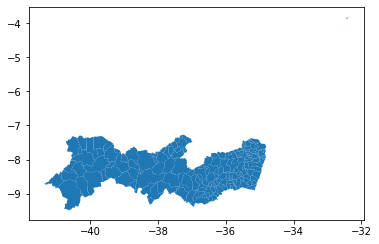

In [29]:
peMunicipios.plot()